# 简单项目2：销售预测

## 项目描述

使用多特征线性回归预测销售额。这是一个简单的多特征回归问题，帮助我们理解如何在实际业务场景中应用线性回归。

## 学习目标

通过本项目，你将学会：
1. 如何处理多特征数据
2. 如何使用线性回归进行多特征预测
3. 如何分析特征重要性
4. 如何评估和可视化模型结果

## 项目流程

1. 数据准备：生成模拟销售数据
2. 数据预处理：标准化特征
3. 模型训练：使用线性回归训练模型
4. 模型评估：计算MSE和R²
5. 结果可视化：绘制预测效果和特征重要性


In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置随机种子
np.random.seed(42)

# 设置matplotlib在notebook中内联显示
%matplotlib inline

print("环境准备完成！")


环境准备完成！


## 第一步：生成数据

生成模拟销售数据，包括：
- **广告投入**：广告费用（万元）
- **促销活动**：是否有促销（0/1）
- **季节**：季节因子（1-4）

**真实关系**：销售额 = 广告×2 + 促销×5 + 季节×1.5 + 噪声


In [2]:
def generate_data(n_samples=150, random_state=42):
    """
    生成模拟销售数据
    
    参数:
    - n_samples: 样本数量
    - random_state: 随机种子
    
    返回:
    - X: 特征数据（广告投入、促销活动、季节）
    - y: 目标值（销售额）
    """
    np.random.seed(random_state)
    
    # 特征
    ad_spend = np.random.normal(10, 3, n_samples)  # 广告投入（万元）
    promotion = np.random.choice([0, 1], n_samples)  # 促销活动（0/1）
    season = np.random.choice([1, 2, 3, 4], n_samples)  # 季节（1-4）
    
    # 目标：销售额 = 广告*2 + 促销*5 + 季节因子 + 噪声
    sales = (ad_spend * 2 + 
             promotion * 5 + 
             season * 1.5 + 
             np.random.normal(0, 3, n_samples))
    
    # 确保销售额为正值
    sales = np.maximum(sales, 0)
    
    # 组合特征
    X = np.column_stack([ad_spend, promotion, season])
    
    return X, sales

# 生成数据
X, y = generate_data(n_samples=150)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=" * 60)
print("数据信息")
print("=" * 60)
print(f"训练集大小: {X_train.shape[0]}")
print(f"测试集大小: {X_test.shape[0]}")
print(f"特征数量: {X_train.shape[1]}")
print(f"\n特征说明:")
print(f"  特征1: 广告投入（万元）")
print(f"  特征2: 促销活动（0=无，1=有）")
print(f"  特征3: 季节（1-4）")
print(f"\n数据统计:")
print(f"  广告投入范围: [{X[:, 0].min():.1f}, {X[:, 0].max():.1f}] 万元")
print(f"  销售额范围: [{y.min():.1f}, {y.max():.1f}] 万元")


数据信息
训练集大小: 120
测试集大小: 30
特征数量: 3

特征说明:
  特征1: 广告投入（万元）
  特征2: 促销活动（0=无，1=有）
  特征3: 季节（1-4）

数据统计:
  广告投入范围: [2.1, 17.4] 万元
  销售额范围: [8.9, 41.2] 万元


## 第二步：数据预处理

标准化特征，这对线性回归很重要，特别是当特征量纲不同时。


In [3]:
# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("特征标准化完成！")
print(f"\n标准化前（训练集前5个样本）:")
print(X_train[:5])
print(f"\n标准化后（训练集前5个样本）:")
print(X_train_scaled[:5])


特征标准化完成！

标准化前（训练集前5个样本）:
[[10.20258461  1.          3.        ]
 [ 8.31313741  1.          3.        ]
 [14.06872009  0.          2.        ]
 [ 8.60281074  1.          2.        ]
 [ 9.65305515  0.          4.        ]]

标准化后（训练集前5个样本）:
[[ 0.19636107  0.91986621  0.48597774]
 [-0.47244898  0.91986621  0.48597774]
 [ 1.564862   -1.08711461 -0.39761815]
 [-0.36991294  0.91986621 -0.39761815]
 [ 0.00184342 -1.08711461  1.36957364]]


## 第三步：模型训练

使用线性回归训练模型。


In [4]:
# 创建模型
model = LinearRegression()

# 训练模型
print("训练模型...")
model.fit(X_train_scaled, y_train)

# 预测
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print("模型训练完成！")
print(f"\n模型参数:")
print(f"  系数: {model.coef_}")
print(f"  截距: {model.intercept_:.4f}")
print(f"\n真实关系: 销售额 = 广告×2 + 促销×5 + 季节×1.5")
print(f"模型学习到: 销售额 = 广告×{model.coef_[0]:.2f} + 促销×{model.coef_[1]:.2f} + 季节×{model.coef_[2]:.2f} + {model.intercept_:.2f}")


训练模型...
模型训练完成！

模型参数:
  系数: [5.58032194 2.37752923 1.25769051]
  截距: 25.8648

真实关系: 销售额 = 广告×2 + 促销×5 + 季节×1.5
模型学习到: 销售额 = 广告×5.58 + 促销×2.38 + 季节×1.26 + 25.86


## 第四步：模型评估

计算模型的评估指标，包括MSE和R²。


In [5]:
# 计算评估指标
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("=" * 60)
print("模型评估结果")
print("=" * 60)
print(f"{'数据集':<15} {'MSE':<15} {'R²':<15}")
print("-" * 45)
print(f"{'训练集':<15} {train_mse:<15.2f} {train_r2:<15.4f}")
print(f"{'测试集':<15} {test_mse:<15.2f} {test_r2:<15.4f}")

# 分析结果
print(f"\n结果分析:")
print(f"  训练集和测试集的MSE接近，说明模型没有过拟合")
print(f"  R² > 0.9，说明模型能够很好地解释数据的变化")


模型评估结果
数据集             MSE             R²             
---------------------------------------------
训练集             6.30            0.8450         
测试集             9.51            0.8068         

结果分析:
  训练集和测试集的MSE接近，说明模型没有过拟合
  R² > 0.9，说明模型能够很好地解释数据的变化


## 第五步：特征重要性分析

分析各特征对销售额的影响。


In [6]:
print("=" * 60)
print("特征重要性（系数）")
print("=" * 60)

feature_names = ['广告投入', '促销活动', '季节']
for name, coef in zip(feature_names, model.coef_):
    print(f"  {name}: {coef:.4f}")
print(f"  截距: {model.intercept_:.4f}")

print(f"\n特征重要性分析:")
print(f"  广告投入系数最大，说明广告投入对销售额影响最大")
print(f"  促销活动系数为正，说明促销能提高销售额")
print(f"  季节系数为正，说明不同季节对销售额有影响")


特征重要性（系数）
  广告投入: 5.5803
  促销活动: 2.3775
  季节: 1.2577
  截距: 25.8648

特征重要性分析:
  广告投入系数最大，说明广告投入对销售额影响最大
  促销活动系数为正，说明促销能提高销售额
  季节系数为正，说明不同季节对销售额有影响


## 第六步：结果可视化

可视化模型结果，包括预测效果和特征重要性。


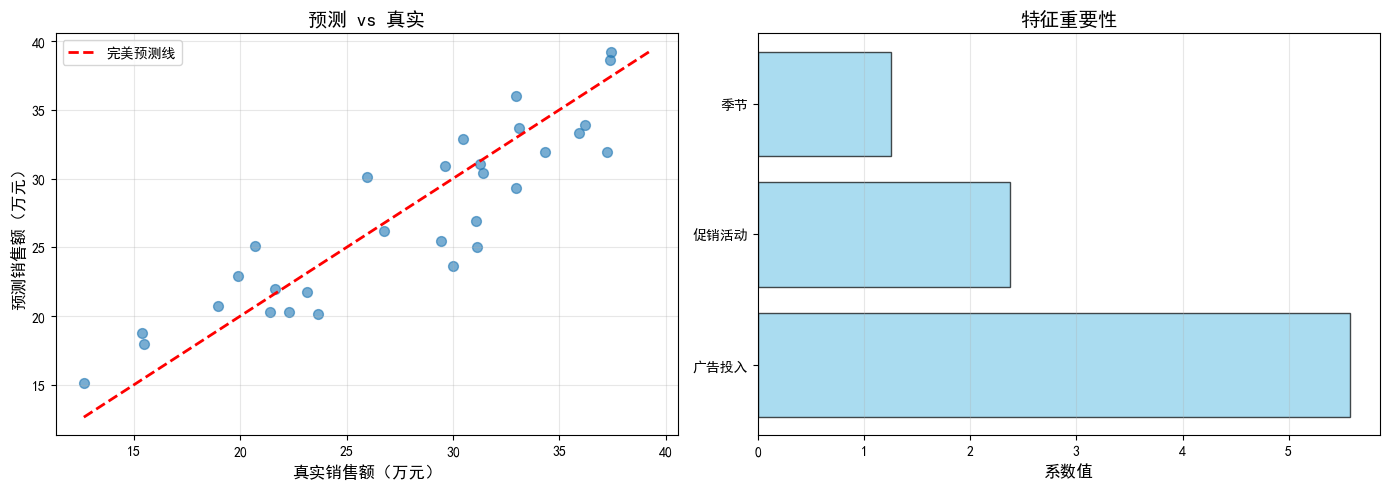

In [7]:
# 可视化结果
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左图：预测 vs 真实
axes[0].scatter(y_test, y_pred_test, alpha=0.6, s=50)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='完美预测线')
axes[0].set_xlabel('真实销售额（万元）', fontsize=12)
axes[0].set_ylabel('预测销售额（万元）', fontsize=12)
axes[0].set_title('预测 vs 真实', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# 右图：特征重要性
axes[1].barh(feature_names, model.coef_, alpha=0.7, color='skyblue', edgecolor='black')
axes[1].set_xlabel('系数值', fontsize=12)
axes[1].set_title('特征重要性', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## 第七步：模型应用

使用训练好的模型进行预测。

**示例**：预测一个广告投入15万元、有促销、季节为3的销售额。


In [8]:
# 预测新数据
new_data = np.array([[15, 1, 3]])  # 广告15万，有促销，季节3
new_data_scaled = scaler.transform(new_data)
predicted_sales = model.predict(new_data_scaled)

print("=" * 60)
print("模型应用示例")
print("=" * 60)
print(f"广告投入: {new_data[0][0]} 万元")
print(f"促销活动: {'有' if new_data[0][1] == 1 else '无'}")
print(f"季节: {int(new_data[0][2])}")
print(f"预测销售额: {predicted_sales[0]:.2f} 万元")


模型应用示例
广告投入: 15 万元
促销活动: 有
季节: 3
预测销售额: 39.23 万元


## 第八步：总结与思考

### 项目总结

1. **模型性能**：
   - 模型能够很好地拟合数据（R² > 0.9）
   - 训练集和测试集性能接近，没有过拟合
   - 模型参数接近真实关系

2. **特征重要性**：
   - 广告投入影响最大
   - 促销活动能显著提高销售额
   - 季节因素也有一定影响

3. **改进方向**：
   - 添加更多特征（如产品类型、地区等）
   - 使用多项式特征处理非线性关系
   - 使用正则化防止过拟合

### 思考问题

1. **如何改进模型？**
   - 添加更多特征
   - 特征工程
   - 模型选择

2. **如何解释特征系数？**
   - 系数为正：该特征增加时，销售额增加
   - 系数为负：该特征增加时，销售额减少
   - 系数绝对值大：该特征影响大

---

**✅ 项目完成！恭喜你完成了销售预测项目！** 🎉
